In [126]:
# Read dataset and split to train and test data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the csv file to pandas dataframe
dataset = pd.read_csv('assets/output/preprocessedDataset.csv')

print(dataset)

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)


# Split the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

            date  sulfur_dioxide_min  sulfur_dioxide_max  sulfur_dioxide_mean  \
0     2009-01-09            1.394785            4.238253             3.353317   
1     2009-01-10           -0.638399            0.260652            -0.289450   
2     2009-01-11           -0.638399            3.876653             1.712682   
3     2009-01-12           -0.638399           -0.100949             0.322313   
4     2009-01-14            0.378193            4.599854             2.546903   
...          ...                 ...                 ...                  ...   
1589  2019-12-04            0.378193           -0.824149            -0.400679   
1590  2019-12-11            0.378193           -0.824149            -0.400679   
1591  2019-12-19            1.394785           -0.462549             0.266698   
1592  2019-12-20            1.394785           -0.462549             0.266698   
1593  2019-12-22            0.378193           -0.824149            -0.400679   

      sulfur_dioxide_median

In [127]:
# Make the Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': np.arange(100,700, 100),
        }

model = GradientBoostingRegressor(random_state=0)

grid_model = GridSearchCV(model, param_grid=grid_params, cv=5, n_jobs=-1)

In [128]:
# Fit the model
from sklearn.metrics import mean_squared_error


grid_model.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:\n', grid_model.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_model.best_score_))

9070.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9070.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9070.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9070.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9070.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9070.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9070.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9070.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


최적 하이퍼 파라미터:
 {'n_estimators': 100}
최고 예측 정확도: 0.3477


In [129]:
# Define the model with best parameters

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.34666385469652694


9089.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9089.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


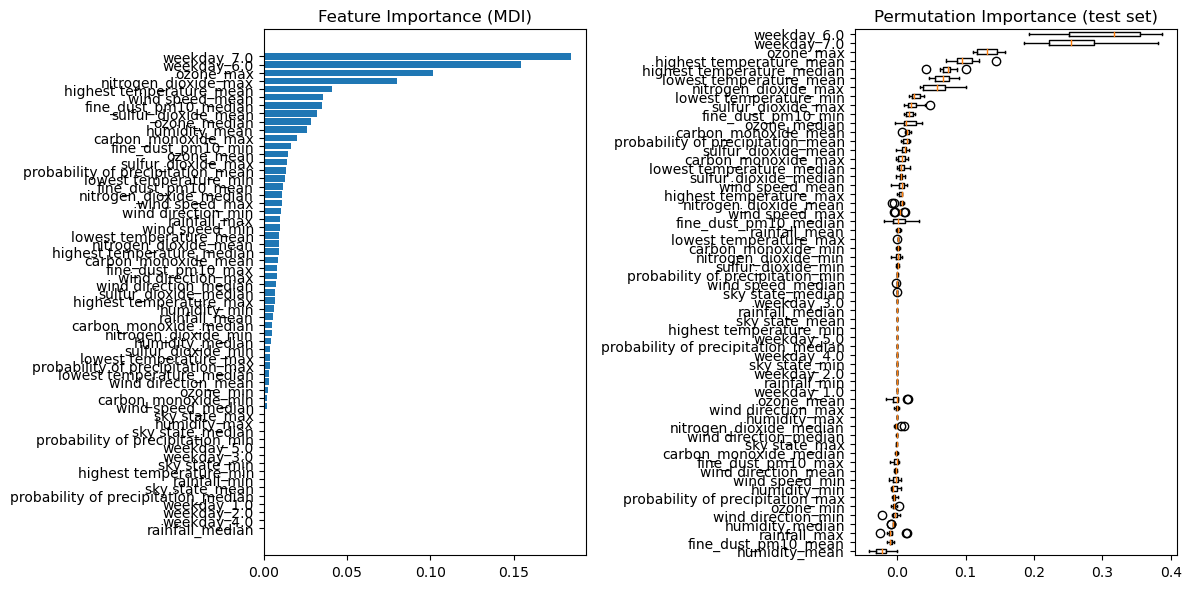

In [130]:
from sklearn.inspection import permutation_importance


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [131]:
reduced_X = X_train.iloc[:, sorted_idx[len(sorted_idx) - 10:-1]]

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(reduced_X, Y_train)

print(model.score(X_test.iloc[:, sorted_idx[len(sorted_idx) - 10:-1]], Y_test))

0.23577677496327065
